In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime
print(f"Last edit: {datetime.datetime.now()}")

Last edit: 2025-11-24 20:03:36.891733


## **Regression**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
path = "/content/drive/MyDrive/Master_ML_From_Zero_To_Hero/Data/housing.csv"

In [5]:
California_housing = pd.read_csv(path)

In [6]:
California_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
California_housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
California_housing['total_bedrooms'].head(10)

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
5,213.0
6,489.0
7,687.0
8,665.0
9,707.0


In [9]:
California_housing['total_bedrooms'].fillna(California_housing['total_bedrooms'].mean(), inplace=True)

/tmp/ipython-input-485603190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  California_housing['total_bedrooms'].fillna(California_housing['total_bedrooms'].mean(), inplace=True)


In [10]:
California_housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
California_housing_encoded = pd.get_dummies(California_housing, columns=['ocean_proximity'], dtype= 'int')

In [12]:
California_housing_encoded.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0


In [13]:
California_housing_encoded.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


In [14]:
y = California_housing_encoded["median_house_value"]
X = California_housing_encoded.drop("median_house_value", axis=1)

In [15]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [16]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
feature_means = X_train_scaled.mean(axis=0)

In [20]:
feature_means

array([ 1.75333477e-15,  6.40099515e-17, -9.25185854e-18,  3.37800416e-17,
       -4.59365534e-17, -2.15159501e-19, -5.42201942e-17, -6.51933288e-17,
        9.29489044e-17, -5.80930652e-18, -7.74574203e-18, -1.68900208e-17,
       -1.14572434e-17])

In [21]:
from sklearn.gaussian_process.kernels import WhiteKernel

kernel = (
    1.0 * RBF(length_scale=1.0)
    + 1.0 * Matern(length_scale=1.0, nu=1.5)
    + WhiteKernel(noise_level=1.0)   # 🔥 jitter to ensure positive-definite kernel
)

gpr = GaussianProcessRegressor(
    kernel=kernel,
    alpha=0.0,             # we add noise via WhiteKernel instead
    normalize_y=True
)


In [22]:

subset =2000

X_train_small = X_train_scaled[:subset]
y_train_small = y_train[:subset]


gpr.fit(X_train_small, y_train_small)
print("Optimized Kernel:", gpr.kernel_)


Optimized Kernel: 2.01**2 * RBF(length_scale=4.37) + 0.268**2 * Matern(length_scale=1.01, nu=1.5) + WhiteKernel(noise_level=0.204)


In [23]:
print("R2 Score:", gpr.score(X_test_scaled, y_test))

R2 Score: 0.7235789054541912


In [24]:
y = California_housing_encoded["median_house_value"].values

feature_names = X.columns.tolist()

X = X.values

In [25]:
feature_x = "longitude"
feature_y = "latitude"

ix = feature_names.index(feature_x)
iy = feature_names.index(feature_y)

print("Visualizing:", feature_x, "vs", feature_y)

Visualizing: longitude vs latitude


In [26]:

x_min, x_max = X_train_scaled[:, ix].min(), X_train_scaled[:, ix].max()
y_min, y_max = X_train_scaled[:, iy].min(), X_train_scaled[:, iy].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)


In [27]:
grid = []

for a, b in zip(xx.ravel(), yy.ravel()):
    row = feature_means.copy()
    row[ix] = a
    row[iy] = b
    grid.append(row)

grid = np.array(grid)


In [28]:
pred_mean, pred_std = gpr.predict(grid, return_std=True)

Z = pred_mean.reshape(xx.shape)
Z_std = pred_std.reshape(xx.shape)


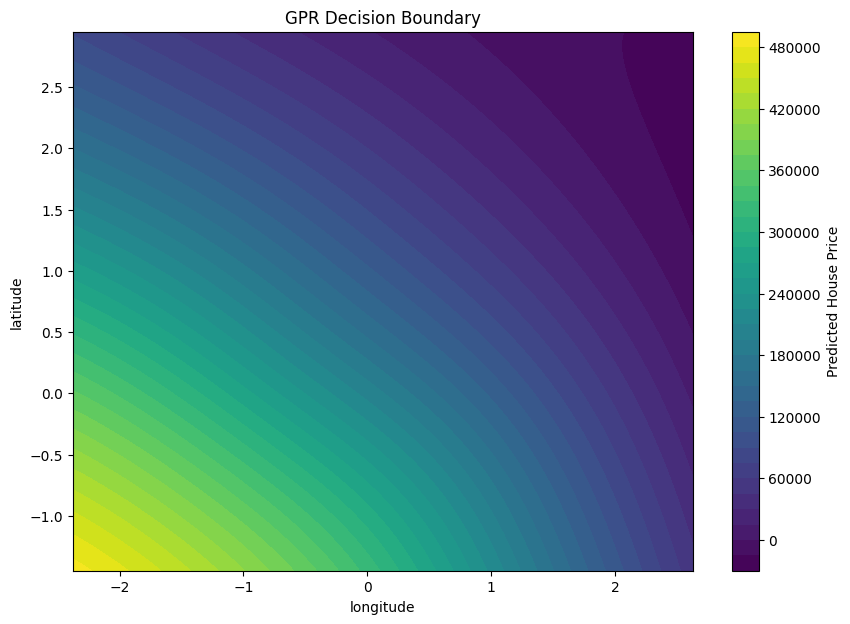

In [29]:
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, levels=40)
plt.colorbar(label="Predicted House Price")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("GPR Decision Boundary")
plt.show()


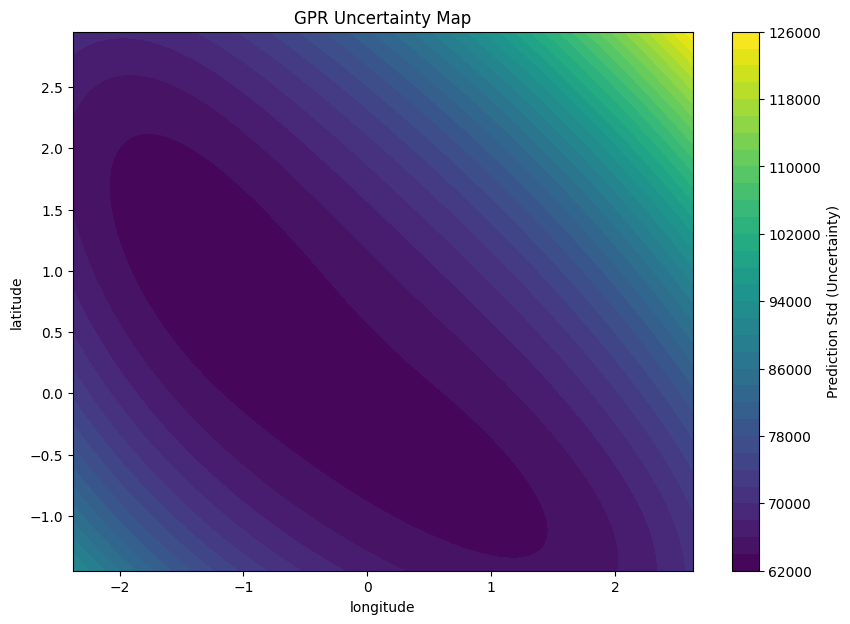

In [30]:
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z_std, levels=40)
plt.colorbar(label="Prediction Std (Uncertainty)")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("GPR Uncertainty Map")
plt.show()


Great👌👌, Now add plot **Illustration of Gaussian Process Regression (GPR) in one dimension.** in the this notebook

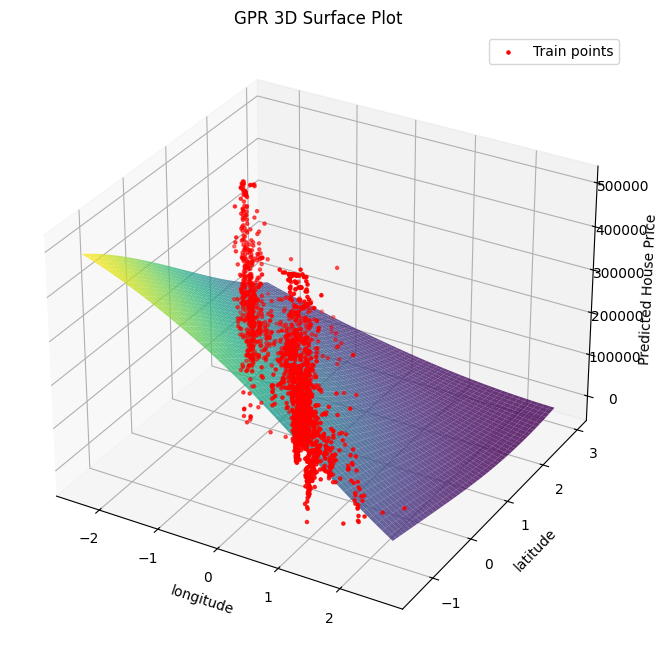

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.8)

# Optional: scatter training points in 3D
ax.scatter(
    X_train_small[:, ix], X_train_small[:, iy], y_train_small,
    color='red', s=5, label='Train points'
)

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel('Predicted House Price')
ax.set_title('GPR 3D Surface Plot')
plt.legend()
plt.show()

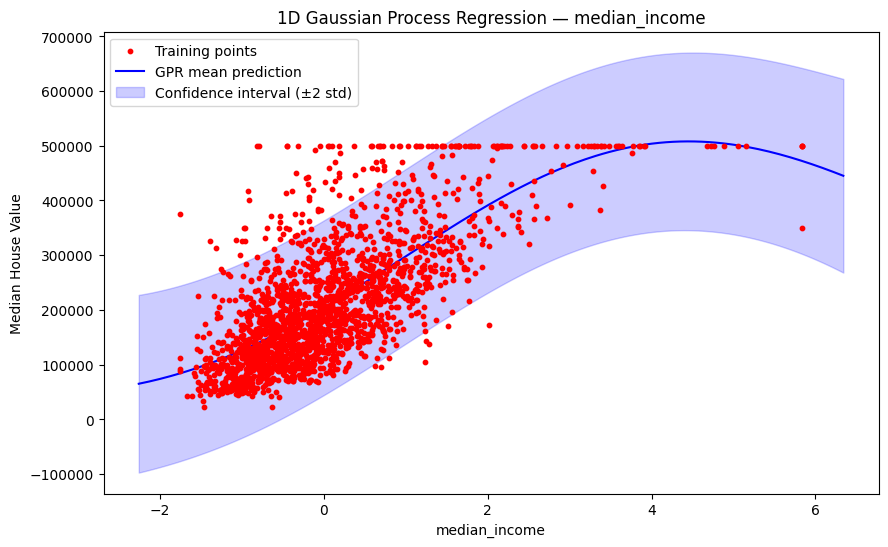

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel

# --- Select one feature for 1D illustration ---
feature_1d = "median_income"  # you can try "latitude" too
ix_1d = feature_names.index(feature_1d)

X_1d = X_train_scaled[:subset, ix_1d].reshape(-1,1)  # use subset for speed
y_1d = y_train_small

# --- Define kernel ---
kernel_1d = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr_1d = GaussianProcessRegressor(kernel=kernel_1d, normalize_y=True)

# --- Train GPR ---
gpr_1d.fit(X_1d, y_1d)

# --- Predict on a fine grid ---
X_grid = np.linspace(X_1d.min()-0.5, X_1d.max()+0.5, 200).reshape(-1,1)
y_pred, y_std = gpr_1d.predict(X_grid, return_std=True)

# --- Plot ---
plt.figure(figsize=(10,6))
plt.scatter(X_1d, y_1d, color='red', label='Training points', s=10, zorder=5)
plt.plot(X_grid, y_pred, color='blue', label='GPR mean prediction')
plt.fill_between(
    X_grid.ravel(),
    y_pred - 2*y_std,
    y_pred + 2*y_std,
    color='blue',
    alpha=0.2,
    label='Confidence interval (±2 std)'
)
plt.xlabel(feature_1d)
plt.ylabel("Median House Value")
plt.title(f"1D Gaussian Process Regression — {feature_1d}")
plt.legend()
plt.show()

## **Classification**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform


In [41]:
data = load_wine()
X = data.data
y = data.target

In [42]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

print("Shape after PCA:", X_2d.shape)

Shape after PCA: (178, 2)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.25, random_state=42, stratify=y
)

In [44]:
X_train.shape, X_test.shape

((133, 2), (45, 2))

In [48]:
from scipy.stats import uniform
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel

# Parameter distributions
param_distributions = [
    {
        "kernel": [1.0 * RBF(length_scale=1.0)],
        "kernel__k2__length_scale": uniform(loc=0.1, scale=2.9),
    },
    {
        "kernel": [1.0 * Matern(length_scale=1.0, nu=1.5)],
        "kernel__k2__length_scale": uniform(loc=0.1, scale=2.9),
        "kernel__k2__nu": [0.5, 1.5, 2.5]
    },
]

gpc = GaussianProcessClassifier(random_state=42)


random_search = RandomizedSearchCV(
    estimator=gpc,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found:")
print(random_search.best_params_)

best_gpc = random_search.best_estimator_

Best parameters found:
{'kernel': 1**2 * RBF(length_scale=1), 'kernel__k2__length_scale': np.float64(2.2227824312530746)}


In [49]:
y_pred = best_gpc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7111111111111111

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.72      0.72      0.72        18
           2       0.46      0.50      0.48        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.72      0.71      0.72        45



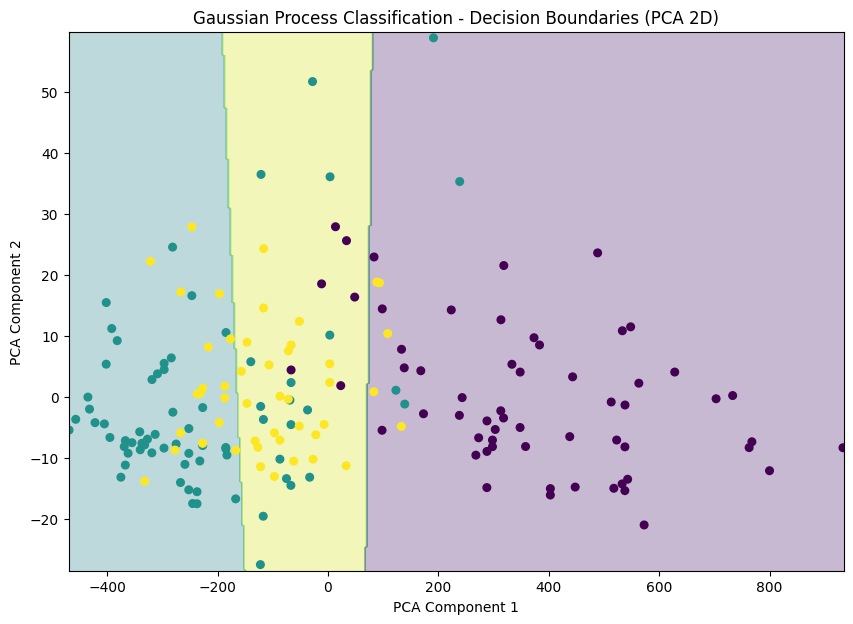

In [50]:

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400),
)


Z = best_gpc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=30)
plt.title("Gaussian Process Classification - Decision Boundaries (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
